## 0. 데이터 준비

In [1]:
# !pip install pandas mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [4]:
# 1. 데이터 로드
df = pd.read_csv('./DataSet_v(0)_final_0-4.csv')
df_origin = df

In [6]:
df.head()

,성별,나이,범주형 나이,연령대분류,범주형 발생일,요일,위해원인,위해증상,위해부위,발생장소,품목대분류,품목중분류,품목
0,남자,59,55-59,성인,20200301-10,일요일,부패·변질,가려움,(부위)전신 손상,주택 - 주방,식물 식품,곡류-곡류,쌀
1,여자,39,35-39,성인,20200621-30,화요일,부패·변질,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방,식물 식품,곡류-곡류,쌀
2,여자,2,0-4,유아,20200611-20,금요일,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품,곡류-곡류,쌀
3,여자,52,50-54,성인,20200311-20,수요일,식품 섭취에 의한 위험 및 위해,두드러기,"(부위)팔(아래부분, 팔꿈치 및 손목 제외)",주택 - 거실,식물 식품,곡류-곡류,쌀
4,여자,3,0-4,유아,20200511-20,수요일,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품,곡류-곡류,쌀


In [8]:
df_age = df[['성별', '나이', '범주형 발생일', '위해원인', '위해증상', '위해부위', '발생장소','품목대분류']]
df_age.head()

,성별,나이,범주형 발생일,위해원인,위해증상,위해부위,발생장소,품목대분류
0,남자,59,20200301-10,부패·변질,가려움,(부위)전신 손상,주택 - 주방,식물 식품
1,여자,39,20200621-30,부패·변질,소화기계통 장기손상 및 통증,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 주방,식물 식품
2,여자,2,20200611-20,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품
3,여자,52,20200311-20,식품 섭취에 의한 위험 및 위해,두드러기,"(부위)팔(아래부분, 팔꿈치 및 손목 제외)",주택 - 거실,식물 식품
4,여자,3,20200511-20,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품


In [9]:
print(df_age['위해증상'].str.contains('해당없음').sum())
print(df_age['위해부위'].str.contains('(부위)해당없음').sum())

0
0


/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_4315/900150110.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df_age['위해부위'].str.contains('(부위)해당없음').sum())


# [ 0세 분석 ]

In [13]:
df_v1 = df_age[df_age['나이'] == 0]
df_v1['나이'].unique()

array([0])

In [14]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
22,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)전신 손상,주택 - 주방,식물 식품
36,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)이마,주택 - 거실,식물 식품
39,여자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)전신 손상,"기타 - 상세불명의 장소, 부대·부속시설",식물 식품
112,남자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)전신 손상,주택 - 거실,식물 식품
155,남자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)전신 손상,주택 - 주방,식물 식품
156,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,"(부위)입술, 혀",주택 - 거실,식물 식품
174,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)등,주택 - 거실,식물 식품
193,남자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)등,주택 - 주방,식물 식품
198,여자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)전신 손상,주택 - 주방,식물 식품
216,남자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)전신 손상,주택 - 주방,식물 식품


## 1. 빈발항목 분석

In [15]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [16]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)머리카락,(부위)목,...,폭발,피부염 또는 피부발진,피부접촉에 의한 위험 및 위해,해당없음,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화장품 및 화장용품,화재 안전 및 보안 장비
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

가구 및 가구설비         5671
추락                5514
남자                4600
주택 - 침실/방         4576
(부위)머리 및 뇌(뇌막)    4136
여자                3875
타박상               2958
주택 - 거실           1596
뇌진탕               1453
주택 - 주방           1021
dtype: int64

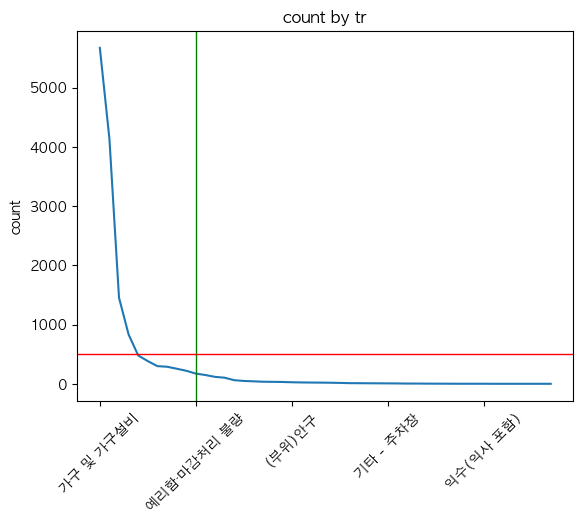

In [18]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [42]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
9,0.668435,(가구 및 가구설비)
5,0.649929,(추락)
37,0.640853,"(가구 및 가구설비, 추락)"
3,0.542197,(남자)
4,0.539368,(주택 - 침실/방 )
...,...,...
84,0.109382,"(여자, 타박상, 가구 및 가구설비, (부위)머리 및 뇌(뇌막))"
88,0.109029,"(가구 및 가구설비, 추락, 여자, 타박상, 주택 - 침실/방 )"
85,0.108204,"(가구 및 가구설비, 추락, 여자, 타박상, (부위)머리 및 뇌(뇌막))"
26,0.103253,"(주택 - 거실 , 남자)"


#### 빈발집합 분석 결과

- 무수히 많이 나와서 유의미한 분석 불가능 (107*2)

## 2. 연관규칙 분석

In [36]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)
# rules_conf.head(20).sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
366,"(뇌진탕, 추락, 주택 - 침실/방 )",(가구 및 가구설비),0.117515,0.668435,0.117280,0.997994,1.493031,0.038728,165.285302,0.374195
381,"(뇌진탕, 추락, 주택 - 침실/방 , (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.116808,0.668435,0.116572,0.997982,1.493013,0.038494,164.290606,0.373887
308,"(여자, 타박상, 추락, 주택 - 침실/방 )",(가구 및 가구설비),0.109382,0.668435,0.109029,0.996767,1.491196,0.035914,102.564199,0.369853
323,"(타박상, 추락, 주택 - 침실/방 )",(가구 및 가구설비),0.226544,0.668435,0.225719,0.996358,1.490584,0.074289,91.038358,0.425521
43,"(여자, 추락, 주택 - 침실/방 , (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.154998,0.668435,0.154408,0.996198,1.490344,0.050802,87.201674,0.389365
...,...,...,...,...,...,...,...,...,...,...
290,"(가구 및 가구설비, 추락, (부위)머리 및 뇌(뇌막), 여자)",(타박상),0.215582,0.348656,0.108204,0.501914,1.439566,0.033040,1.307692,0.389265
257,"(타박상, 주택 - 침실/방 )","(가구 및 가구설비, 남자)",0.236327,0.354314,0.118576,0.501746,1.416104,0.034842,1.295896,0.384769
162,(추락),"(주택 - 침실/방 , (부위)머리 및 뇌(뇌막))",0.649929,0.330858,0.325908,0.501451,1.515607,0.110873,1.342178,0.971799
221,"(타박상, 추락)","(가구 및 가구설비, 주택 - 침실/방 , (부위)머리 및 뇌(뇌막))",0.317775,0.326615,0.159241,0.501113,1.534262,0.055451,1.349774,0.510419


#### 최소 신뢰도 0.5 이상의 연관 규칙 분석

- 393*10 ; 무수히 많은 규칙 보임

- 현 상태로 분석하기 어려워 보임, 상위규칙 분석으로 넘어가서 자세히 분석하기로 함

==> 언뜻 봐도 0.9 이상이 굉장히 많음! 지지도처럼 0.9 이상의 굉장히 큰 값은 제외 후 분석하기로 함 (0.9 이상 값의 경우 당연한 값들로 보임)


In [43]:
# 최대 지지도 필터 적용
max_threshold = 0.9

rules_conf = rules_conf[rules_conf['confidence'] <= max_threshold]

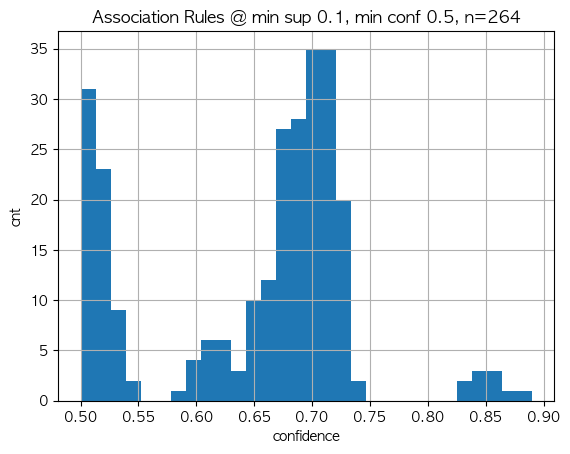

In [44]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

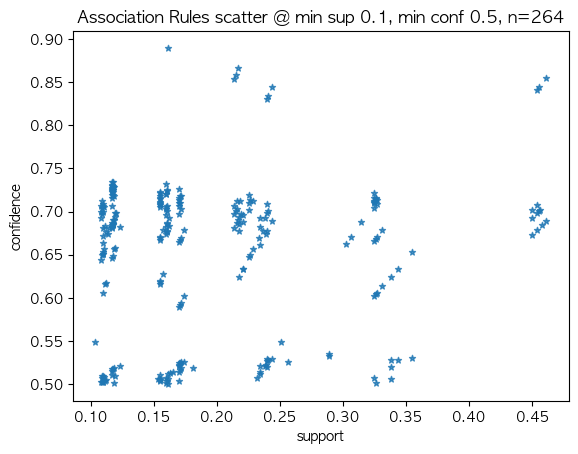

In [45]:
rules_conf.plot.scatter('support','confidence', alpha = 0.8, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

/var/folders/06/qxzmlc5s27n22bkjvmvzp7ww0000gn/T/ipykernel_4315/1207547000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']


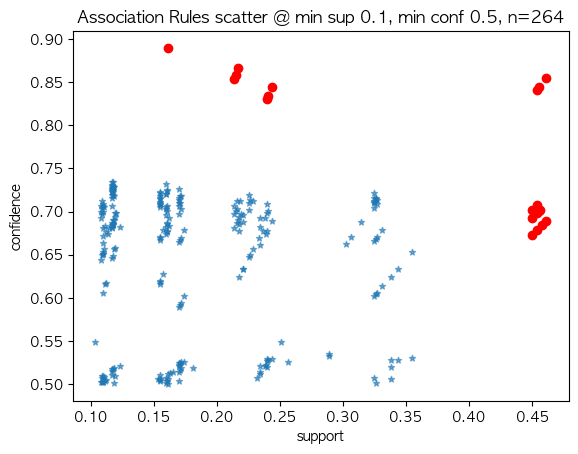

In [46]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [50]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
67,(주택 - 침실/방 ),(가구 및 가구설비),0.539368,0.668435,0.460985,0.854677,1.278624,0.100453,2.281568,0.473066,1.315662
69,(주택 - 침실/방 ),(추락),0.539368,0.649929,0.455681,0.844843,1.299899,0.105130,2.256230,0.500855,1.300524
90,(주택 - 침실/방 ),"(가구 및 가구설비, 추락)",0.539368,0.640853,0.453678,0.841128,1.312512,0.108022,2.260598,0.516903,1.294805
85,"(가구 및 가구설비, 추락)",(주택 - 침실/방 ),0.640853,0.539368,0.453678,0.707927,1.312512,0.108022,1.577113,0.662966,1.161605
93,(추락),((부위)머리 및 뇌(뇌막)),0.649929,0.487506,0.456153,0.701850,1.439675,0.139308,1.718913,0.872391,1.158003
68,(추락),(주택 - 침실/방 ),0.649929,0.539368,0.455681,0.701124,1.299899,0.105130,1.541216,0.659037,1.156806
89,(추락),"(가구 및 가구설비, 주택 - 침실/방 )",0.649929,0.460985,0.453678,0.698041,1.514237,0.154070,1.785061,0.970094,1.151719
100,"(가구 및 가구설비, 추락)",((부위)머리 및 뇌(뇌막)),0.640853,0.487506,0.449788,0.701858,1.439691,0.137368,1.718958,0.850367,1.151645
66,(가구 및 가구설비),(주택 - 침실/방 ),0.668435,0.539368,0.460985,0.689649,1.278624,0.100453,1.484229,0.657213,1.150634
98,(가구 및 가구설비),((부위)머리 및 뇌(뇌막)),0.668435,0.487506,0.457567,0.684535,1.404158,0.131701,1.624569,0.868093,1.142103


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - leverage가 0.6 이하인 경우 제거함
> - (인덱스 : 237, 13, 83, 7, 74, 5, 72)

In [51]:
indices_to_drop = [237, 13, 83, 7, 74, 5, 72]
top_13_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [52]:
top_13_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(주택 - 침실/방 ),(가구 및 가구설비),0.539368,0.668435,0.460985,0.854677,1.278624,0.100453,2.281568,0.473066,1.315662
1,(주택 - 침실/방 ),(추락),0.539368,0.649929,0.455681,0.844843,1.299899,0.105130,2.256230,0.500855,1.300524
2,(주택 - 침실/방 ),"(가구 및 가구설비, 추락)",0.539368,0.640853,0.453678,0.841128,1.312512,0.108022,2.260598,0.516903,1.294805
3,"(가구 및 가구설비, 추락)",(주택 - 침실/방 ),0.640853,0.539368,0.453678,0.707927,1.312512,0.108022,1.577113,0.662966,1.161605
4,(추락),((부위)머리 및 뇌(뇌막)),0.649929,0.487506,0.456153,0.701850,1.439675,0.139308,1.718913,0.872391,1.158003
5,(추락),(주택 - 침실/방 ),0.649929,0.539368,0.455681,0.701124,1.299899,0.105130,1.541216,0.659037,1.156806
6,(추락),"(가구 및 가구설비, 주택 - 침실/방 )",0.649929,0.460985,0.453678,0.698041,1.514237,0.154070,1.785061,0.970094,1.151719
7,"(가구 및 가구설비, 추락)",((부위)머리 및 뇌(뇌막)),0.640853,0.487506,0.449788,0.701858,1.439691,0.137368,1.718958,0.850367,1.151645
8,(가구 및 가구설비),(주택 - 침실/방 ),0.668435,0.539368,0.460985,0.689649,1.278624,0.100453,1.484229,0.657213,1.150634
9,(가구 및 가구설비),((부위)머리 및 뇌(뇌막)),0.668435,0.487506,0.457567,0.684535,1.404158,0.131701,1.624569,0.868093,1.142103


#### [ 상위 20개 중 13개 뽑아냄 ]

- 특징 파악 (분석) 할 필요 없이, 당연한 내용만 반복되는 것 확인 가능, 무의미한 분석 -> 보고서에 넣지 않음

In [53]:
# 보고서용 정렬
top_13_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(주택 - 침실/방 ),(가구 및 가구설비),0.539368,0.668435,0.460985,0.854677,1.278624,0.100453,2.281568,0.473066,1.315662
1,(주택 - 침실/방 ),(추락),0.539368,0.649929,0.455681,0.844843,1.299899,0.105130,2.256230,0.500855,1.300524
2,(주택 - 침실/방 ),"(가구 및 가구설비, 추락)",0.539368,0.640853,0.453678,0.841128,1.312512,0.108022,2.260598,0.516903,1.294805
3,"(가구 및 가구설비, 추락)",(주택 - 침실/방 ),0.640853,0.539368,0.453678,0.707927,1.312512,0.108022,1.577113,0.662966,1.161605
7,"(가구 및 가구설비, 추락)",((부위)머리 및 뇌(뇌막)),0.640853,0.487506,0.449788,0.701858,1.439691,0.137368,1.718958,0.850367,1.151645
4,(추락),((부위)머리 및 뇌(뇌막)),0.649929,0.487506,0.456153,0.701850,1.439675,0.139308,1.718913,0.872391,1.158003
5,(추락),(주택 - 침실/방 ),0.649929,0.539368,0.455681,0.701124,1.299899,0.105130,1.541216,0.659037,1.156806
6,(추락),"(가구 및 가구설비, 주택 - 침실/방 )",0.649929,0.460985,0.453678,0.698041,1.514237,0.154070,1.785061,0.970094,1.151719
10,(추락),"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",0.649929,0.457567,0.449788,0.692057,1.512470,0.152402,1.761469,0.967890,1.141844
8,(가구 및 가구설비),(주택 - 침실/방 ),0.668435,0.539368,0.460985,0.689649,1.278624,0.100453,1.484229,0.657213,1.150634


# [ 1세 분석 ]

In [55]:
df_v1 = df_age[df_age['나이'] == 1]
df_v1['나이'].unique()

array([1])

In [56]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
10,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)귀 및 고막,주택 - 주방,식물 식품
25,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
43,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
75,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
76,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
107,여자,식품 섭취에 의한 위험 및 위해,구토,"(부위)신체내부-소화계통(식도,위장,대장 등)",주택 - 거실,식물 식품
113,남자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)목,주택 - 거실,식물 식품
117,남자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)목,주택 - 침실/방,식물 식품
118,여자,식품 섭취에 의한 위험 및 위해,두드러기,(부위)기타 얼굴부위,주택 - 거실,식물 식품
167,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품


## 1. 빈발항목 분석

In [57]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [58]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)목,(부위)무릎,...,피부염 또는 피부발진,피부접촉에 의한 위험 및 위해,해당없음,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화장품 및 화장용품,화재 안전 및 보안 장비
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                   7106
여자                   4945
열상(찢어짐)              4412
가구 및 가구설비            3658
미끄러짐·넘어짐             3411
추락                   3360
주택 - 거실              3358
건축/인테리어 자재 및 작업공구    3357
주택 - 침실/방            3326
(부위)머리 및 뇌(뇌막)       2401
dtype: int64

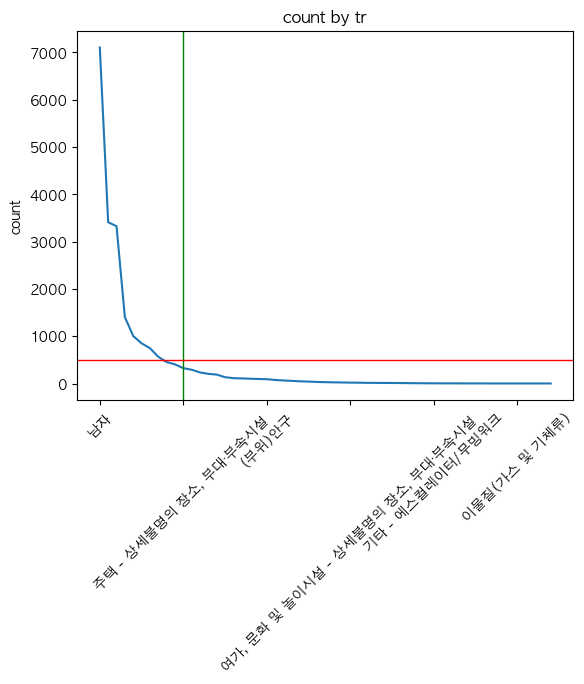

In [60]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [61]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
3,0.589612,(남자)
0,0.410305,(여자)
8,0.366080,(열상(찢어짐))
11,0.303518,(가구 및 가구설비)
10,0.283024,(미끄러짐·넘어짐)
6,0.278792,(추락)
2,0.278626,(주택 - 거실 )
12,0.278543,(건축/인테리어 자재 및 작업공구)
4,0.275971,(주택 - 침실/방 )
25,0.253402,"(가구 및 가구설비, 추락)"


## 2. 연관규칙 분석

In [62]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,"(추락, 주택 - 침실/방 )",(가구 및 가구설비),0.107285,0.303518,0.106455,0.992266,3.269216,0.073892,90.055111,0.777534
15,"(가구 및 가구설비, (부위)머리 및 뇌(뇌막))",(추락),0.132592,0.278792,0.123880,0.934293,3.351220,0.086914,10.976100,0.808848
16,"(추락, (부위)머리 및 뇌(뇌막))",(가구 및 가구설비),0.133505,0.303518,0.123880,0.927906,3.057167,0.083359,9.660684,0.776576
11,"(여자, 추락)",(가구 및 가구설비),0.126037,0.303518,0.115997,0.920342,3.032249,0.077743,8.743438,0.766865
2,"(가구 및 가구설비, 주택 - 침실/방 )",(추락),0.116661,0.278792,0.106455,0.912518,3.273114,0.073931,8.244054,0.786200
6,(추락),(가구 및 가구설비),0.278792,0.303518,0.253402,0.908929,2.994644,0.168784,7.647645,0.923548
9,"(추락, 남자)",(가구 및 가구설비),0.152755,0.303518,0.137405,0.899511,2.963616,0.091041,6.930936,0.782034
10,"(가구 및 가구설비, 여자)",(추락),0.133339,0.278792,0.115997,0.869944,3.120406,0.078824,5.545366,0.784077
36,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.170677,0.283024,0.145038,0.849781,3.002511,0.096733,4.772882,0.804205
5,(가구 및 가구설비),(추락),0.303518,0.278792,0.253402,0.834882,2.994644,0.168784,4.367846,0.956336


#### 최소 신뢰도 0.5 이상의 연관 규칙 분석

==> 언뜻 봐도 0.9 이상이 굉장히 많음! 지지도처럼 0.9 이상의 굉장히 큰 값은 제외 후 분석하기로 함 (0.9 이상 값의 경우 당연한 값들로 보임)

In [63]:
# 최대 지지도 필터 적용
max_threshold = 0.9

rules_conf = rules_conf[rules_conf['confidence'] <= max_threshold]

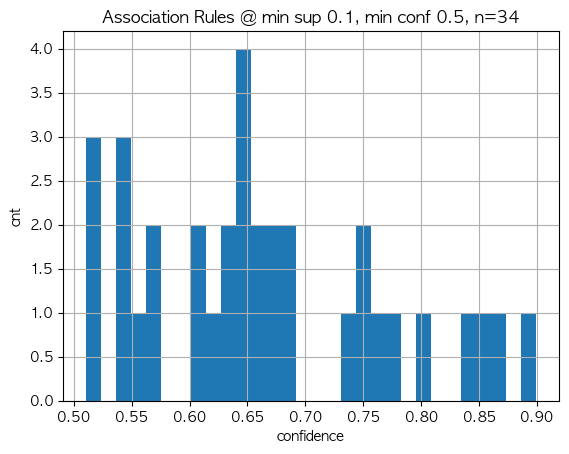

In [64]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

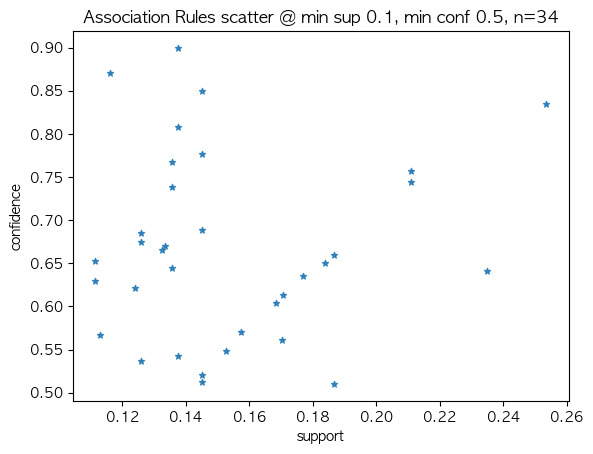

In [66]:
rules_conf.plot.scatter('support','confidence', alpha = 0.85, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

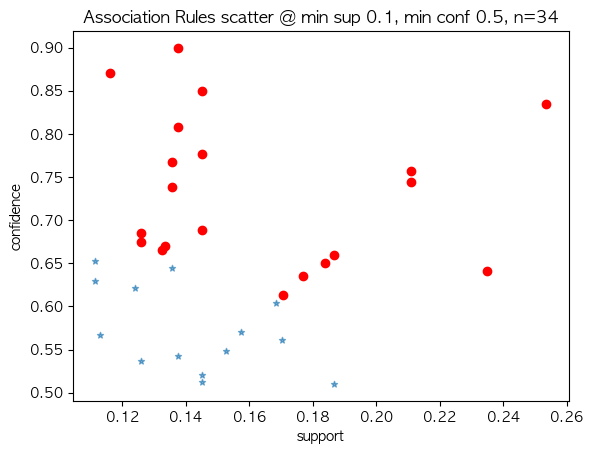

In [68]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [69]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
5,(가구 및 가구설비),(추락),0.303518,0.278792,0.253402,0.834882,2.994644,0.168784,4.367846,0.956336,1.088284
9,"(추락, 남자)",(가구 및 가구설비),0.152755,0.303518,0.137405,0.899511,2.963616,0.091041,6.930936,0.782034,1.036916
36,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.170677,0.283024,0.145038,0.849781,3.002511,0.096733,4.772882,0.804205,0.994819
10,"(가구 및 가구설비, 여자)",(추락),0.133339,0.278792,0.115997,0.869944,3.120406,0.078824,5.545366,0.784077,0.985941
28,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.278543,0.283024,0.210753,0.756628,2.673374,0.131919,2.946010,0.867607,0.967381
29,(미끄러짐·넘어짐),(건축/인테리어 자재 및 작업공구),0.283024,0.278543,0.210753,0.744650,2.673374,0.131919,2.825362,0.873029,0.955403
8,"(가구 및 가구설비, 남자)",(추락),0.170179,0.278792,0.137405,0.807411,2.896106,0.089960,3.744805,0.788976,0.944816
37,"(미끄러짐·넘어짐, 열상(찢어짐))",(건축/인테리어 자재 및 작업공구),0.186774,0.278543,0.145038,0.776544,2.787878,0.093014,3.228628,0.788593,0.921582
30,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.176983,0.283024,0.135745,0.766995,2.710003,0.085655,3.077084,0.766687,0.902740
18,(열상(찢어짐)),(남자),0.366080,0.589612,0.234733,0.641206,1.087505,0.018888,1.143799,0.126931,0.875939


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - leverage가 0.7 이하인 경우 제거함
> - (인덱스 : 27, 23, 22, 26, 21, 18)

In [71]:
indices_to_drop = [27, 23, 22, 26, 21, 18]
top_14_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [72]:
top_14_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(가구 및 가구설비),(추락),0.303518,0.278792,0.253402,0.834882,2.994644,0.168784,4.367846,0.956336,1.088284
1,"(추락, 남자)",(가구 및 가구설비),0.152755,0.303518,0.137405,0.899511,2.963616,0.091041,6.930936,0.782034,1.036916
2,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.170677,0.283024,0.145038,0.849781,3.002511,0.096733,4.772882,0.804205,0.994819
3,"(가구 및 가구설비, 여자)",(추락),0.133339,0.278792,0.115997,0.869944,3.120406,0.078824,5.545366,0.784077,0.985941
4,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.278543,0.283024,0.210753,0.756628,2.673374,0.131919,2.946010,0.867607,0.967381
5,(미끄러짐·넘어짐),(건축/인테리어 자재 및 작업공구),0.283024,0.278543,0.210753,0.744650,2.673374,0.131919,2.825362,0.873029,0.955403
6,"(가구 및 가구설비, 남자)",(추락),0.170179,0.278792,0.137405,0.807411,2.896106,0.089960,3.744805,0.788976,0.944816
7,"(미끄러짐·넘어짐, 열상(찢어짐))",(건축/인테리어 자재 및 작업공구),0.186774,0.278543,0.145038,0.776544,2.787878,0.093014,3.228628,0.788593,0.921582
8,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.176983,0.283024,0.135745,0.766995,2.710003,0.085655,3.077084,0.766687,0.902740
9,"(남자, 미끄러짐·넘어짐)",(건축/인테리어 자재 및 작업공구),0.183953,0.278543,0.135745,0.737934,2.649265,0.084506,2.752961,0.762869,0.873679


#### [ 상위 20개 중 14개 뽑아냄 ]

- 0세와 마찬가지로 추락 관련 규칙만 반복적으로 보임, 무의미함

# [ 2세 분석 ]


In [74]:
df_v1 = df_age[df_age['나이'] == 2]
df_v1['나이'].unique()

array([2])

In [75]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
2,여자,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품
12,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
18,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
19,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
29,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
30,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
32,여자,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 침실/방,식물 식품
37,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 침실/방,식물 식품
38,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
42,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품


## 1. 빈발항목 분석

In [76]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [77]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)머리카락,(부위)목,...,폭발,피부염 또는 피부발진,피부접촉에 의한 위험 및 위해,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화장품 및 화장용품,화재 안전 및 보안 장비
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                   5492
여자                   3986
열상(찢어짐)              3553
미끄러짐·넘어짐             2914
주택 - 거실              2642
건축/인테리어 자재 및 작업공구    2325
주택 - 침실/방            2230
가구 및 가구설비            2198
추락                   2105
완구 및 게임용품            1875
dtype: int64

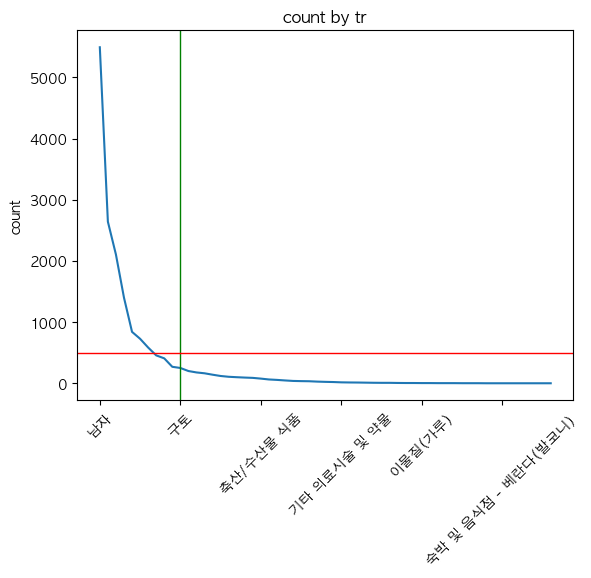

In [79]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [82]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
4,0.579264,(남자)
0,0.420420,(여자)
9,0.374749,(열상(찢어짐))
10,0.307352,(미끄러짐·넘어짐)
2,0.278663,(주택 - 거실 )
13,0.245227,(건축/인테리어 자재 및 작업공구)
25,0.244700,"(남자, 열상(찢어짐))"
5,0.235207,(주택 - 침실/방 )
11,0.231832,(가구 및 가구설비)
8,0.222023,(추락)


## 2. 연관규칙 분석

In [83]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163
26,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.155996,0.307352,0.133741,0.857336,2.789431,0.085795,4.855105,0.760072
10,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892
7,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324
6,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.530690,0.130260,3.599986,0.933089
28,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.154836,0.307352,0.119924,0.774523,2.519991,0.072335,3.071927,0.713676
9,"(가구 및 가구설비, 남자)",(추락),0.133847,0.222023,0.102415,0.765169,3.446352,0.072698,3.312929,0.819529
21,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.245227,0.307352,0.186584,0.760860,2.475537,0.111213,2.896417,0.789704
2,(체내 위험 이물질),((부위)코),0.168653,0.147664,0.126991,0.752971,5.099225,0.102087,3.450343,0.966975
24,"(건축/인테리어 자재 및 작업공구, 미끄러짐·넘어짐)",(열상(찢어짐)),0.186584,0.374749,0.133741,0.716789,1.912715,0.063819,2.207721,0.586641


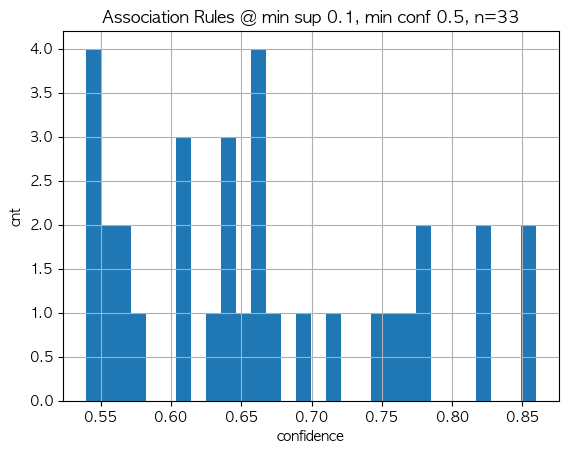

In [84]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

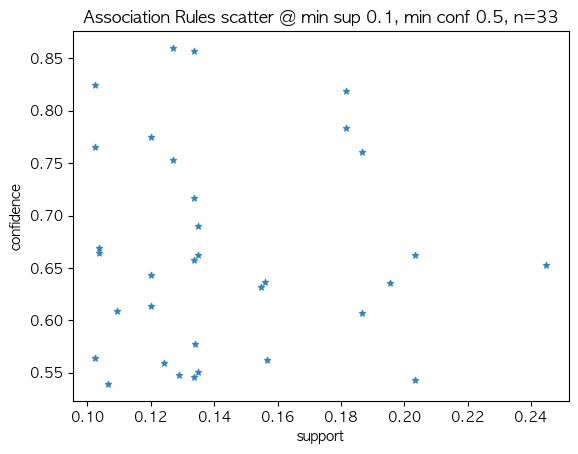

In [85]:
rules_conf.plot.scatter('support','confidence', alpha = 0.8, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

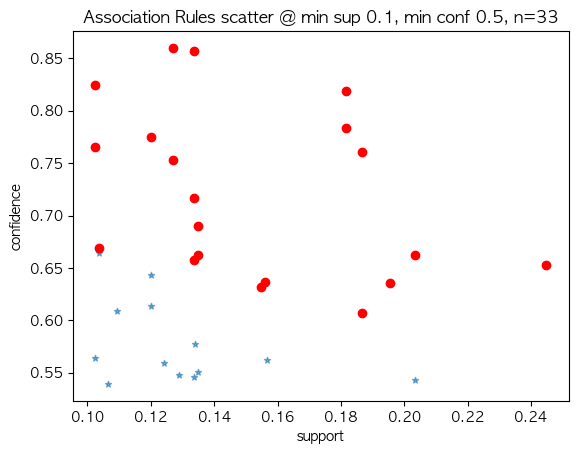

In [87]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 20개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [88]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
7,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324,1.000259
26,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.155996,0.307352,0.133741,0.857336,2.789431,0.085795,4.855105,0.760072,0.991077
1,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163,0.986991
6,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.530690,0.130260,3.599986,0.933089,0.965626
21,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.245227,0.307352,0.186584,0.760860,2.475537,0.111213,2.896417,0.789704,0.947444
10,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892,0.927394
11,(열상(찢어짐)),(남자),0.374749,0.579264,0.244700,0.652969,1.127240,0.027621,1.212389,0.180532,0.897669
28,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.154836,0.307352,0.119924,0.774523,2.519991,0.072335,3.071927,0.713676,0.894447
2,(체내 위험 이물질),((부위)코),0.168653,0.147664,0.126991,0.752971,5.099225,0.102087,3.450343,0.966975,0.879961
9,"(가구 및 가구설비, 남자)",(추락),0.133847,0.222023,0.102415,0.765169,3.446352,0.072698,3.312929,0.819529,0.867585


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - leverage가 0.7 이하인 경우 제거함
> - (인덱스 : 31, 23, 20, 16, 15, 14, 24, 11)

In [89]:
indices_to_drop = [31, 23, 20, 16, 15, 14, 24, 11]
top_12_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [90]:
top_12_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324,1.000259
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.155996,0.307352,0.133741,0.857336,2.789431,0.085795,4.855105,0.760072,0.991077
2,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163,0.986991
3,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.530690,0.130260,3.599986,0.933089,0.965626
4,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.245227,0.307352,0.186584,0.760860,2.475537,0.111213,2.896417,0.789704,0.947444
5,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892,0.927394
6,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.154836,0.307352,0.119924,0.774523,2.519991,0.072335,3.071927,0.713676,0.894447
7,(체내 위험 이물질),((부위)코),0.168653,0.147664,0.126991,0.752971,5.099225,0.102087,3.450343,0.966975,0.879961
8,"(가구 및 가구설비, 남자)",(추락),0.133847,0.222023,0.102415,0.765169,3.446352,0.072698,3.312929,0.819529,0.867585
9,(미끄러짐·넘어짐),(열상(찢어짐)),0.307352,0.374749,0.203460,0.661977,1.766451,0.088280,1.849726,0.626426,0.865436


#### [ 상위 20개 중 12개 뽑아냄 ]

##### 선행절, 후행절 특징
- 선행정과 후행절에 [품목대분류]건축/인테리어 자재 및 작업공구, [위해원인]미끄러짐·넘어짐이 포함되어 있는 경우 다수 존재.
> - 전체 데이터셋에서 확인했을 때 품목별 분석에서의 결과를 토대로 추측되었던 '작은물품의 섭취 문제' 보다는 미끄러짐·넘어짐으로 인한 위해가 더 자주 발생
- 앞선 만 0세, 1세와 다르게 체내 위험 이물질 관련 규칙 보임
> - 본인이 스스로 움직일 수 있고, 호기심이 많아지는 나이가 만 2세부터라는 것을 연관규칙을 통해 유추 가능
> - 또한, 미끄러짐·넘어짐이 추락보다 많은 비율을 차지하는 것을 통해 대부분은 스스로 움직일 수 있는 상태라는 것도 확신 가능
> - 빈발하는 [품목대분류]건축/인테리어 자재 및 작업공구를 제외시키고 분석한다면 섭취관련된 유의미한 규칙을 더 찾을 수 있을 것 같으나, 이는 굳지 진행하지 않음 (일부러 결과를 도출하기 위해 쥐어짜는 느낌이라)

In [123]:
# 보고서용 정렬
top_12_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
2,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163,0.986991
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.155996,0.307352,0.133741,0.857336,2.789431,0.085795,4.855105,0.760072,0.991077
5,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892,0.927394
0,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324,1.000259
3,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.530690,0.130260,3.599986,0.933089,0.965626
6,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.154836,0.307352,0.119924,0.774523,2.519991,0.072335,3.071927,0.713676,0.894447
8,"(가구 및 가구설비, 남자)",(추락),0.133847,0.222023,0.102415,0.765169,3.446352,0.072698,3.312929,0.819529,0.867585
4,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.245227,0.307352,0.186584,0.760860,2.475537,0.111213,2.896417,0.789704,0.947444
7,(체내 위험 이물질),((부위)코),0.168653,0.147664,0.126991,0.752971,5.099225,0.102087,3.450343,0.966975,0.879961
9,(미끄러짐·넘어짐),(열상(찢어짐)),0.307352,0.374749,0.203460,0.661977,1.766451,0.088280,1.849726,0.626426,0.865436


## 3. top 12 분포 확인

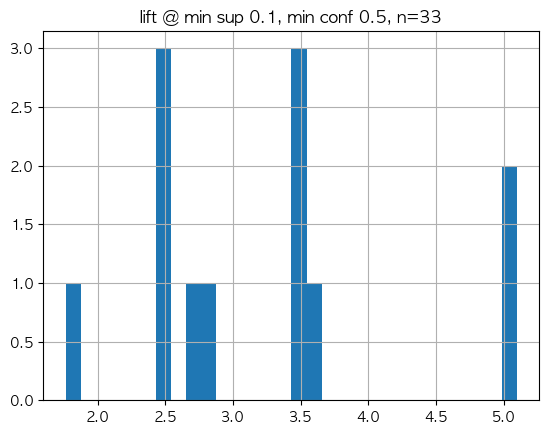

In [91]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_12_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [93]:
filter = top_12_rules.lift.ge(3.0)
top_12_rules[filter].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
7,(체내 위험 이물질),((부위)코),0.168653,0.147664,0.126991,0.752971,5.099225,0.102087,3.450343,0.966975,0.879961
2,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163,0.986991
5,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892,0.927394
0,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324,1.000259
3,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.530690,0.130260,3.599986,0.933089,0.965626
8,"(가구 및 가구설비, 남자)",(추락),0.133847,0.222023,0.102415,0.765169,3.446352,0.072698,3.312929,0.819529,0.867585


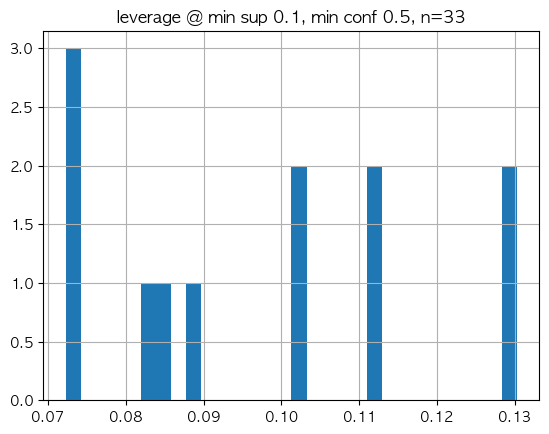

In [94]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_12_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [96]:
filter = top_12_rules.leverage.ge(0.12)
top_12_rules[filter].sort_values(by='leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.53069,0.13026,4.232967,0.921324,1.000259
3,(가구 및 가구설비),(추락),0.231832,0.222023,0.181732,0.783894,3.53069,0.13026,3.599986,0.933089,0.965626


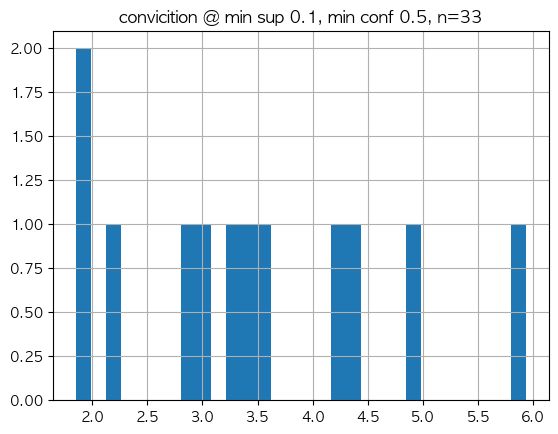

In [97]:
# 확신 관찰
# 연관규칙의 확신 분포
top_12_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음

In [101]:
filter = top_12_rules.conviction.ge(4.0)
top_12_rules[filter].sort_values(by='conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
2,((부위)코),(체내 위험 이물질),0.147664,0.168653,0.126991,0.860000,5.099225,0.102087,5.938192,0.943163,0.986991
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.155996,0.307352,0.133741,0.857336,2.789431,0.085795,4.855105,0.760072,0.991077
5,"(추락, 남자)",(가구 및 가구설비),0.124143,0.231832,0.102415,0.824979,3.558518,0.073635,4.388998,0.820892,0.927394
0,(추락),(가구 및 가구설비),0.222023,0.231832,0.181732,0.818527,3.530690,0.130260,4.232967,0.921324,1.000259


#### [종합 분석 내용]

##### 주요 발견 사항

기존에 특이 규칙으로 발견되었던 체내 위험 이물질 관련 규칙이 도출됨 (관련 내용 위 분석 참고)

## 4. top 12 시각화

In [102]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_12_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


In [103]:
# 전체에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_전체데이터.html")  # 얘 이름 바꾸면서 저장하깅

association_rules_전체데이터.html


# [ 3세 분석 ]

In [104]:
df_v1 = df_age[df_age['나이'] == 3]
df_v1['나이'].unique()

array([3])

In [105]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
4,여자,이물질(기타),체내 위험 이물질,(부위)귀 및 고막,주택 - 주방,식물 식품
13,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
23,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
33,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
44,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
54,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
55,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 주방,식물 식품
57,여자,이물질(기타),체내 위험 이물질,(부위)코,교육시설 - 시설목적공간,식물 식품
63,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 침실/방,식물 식품
64,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품


## 1. 빈발항목 분석

In [106]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [107]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)머리카락,(부위)목,...,피부접촉에 의한 위험 및 위해,해당없음,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화장품 및 화장용품,화재,화재 안전 및 보안 장비
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                   5156
여자                   3658
열상(찢어짐)              3214
미끄러짐·넘어짐             2834
완구 및 게임용품            2290
주택 - 거실              2289
건축/인테리어 자재 및 작업공구    1989
주택 - 침실/방            1867
추락                   1766
가구 및 가구설비            1741
dtype: int64

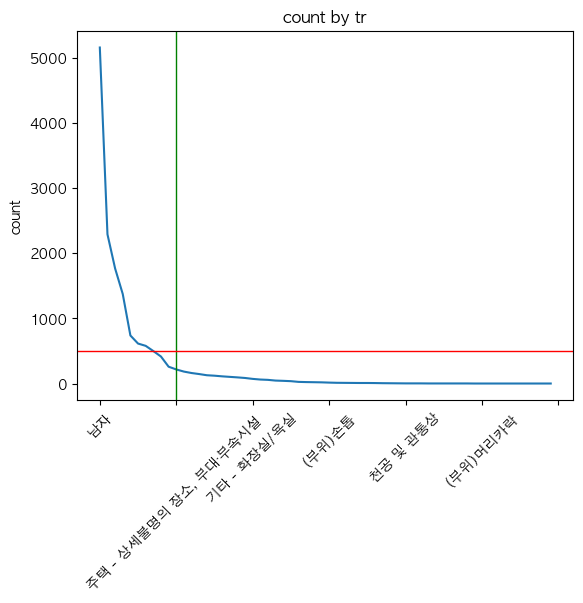

In [109]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [110]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
4,0.584846,(남자)
0,0.414927,(여자)
6,0.364564,(열상(찢어짐))
10,0.321461,(미끄러짐·넘어짐)
12,0.259755,(완구 및 게임용품)
2,0.259642,(주택 - 거실 )
20,0.235141,"(남자, 열상(찢어짐))"
13,0.225613,(건축/인테리어 자재 및 작업공구)
5,0.211774,(주택 - 침실/방 )
24,0.206443,"(남자, 미끄러짐·넘어짐)"


## 2. 연관규칙 분석

In [111]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757
28,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.143262,0.321461,0.121937,0.851148,2.647749,0.075884,4.558483,0.726384
23,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.141674,0.321461,0.111502,0.787030,2.448290,0.065959,3.186072,0.689192
15,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839
20,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.225613,0.321461,0.170599,0.756159,2.352257,0.098073,2.782710,0.742363
16,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097
3,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332
26,"(건축/인테리어 자재 및 작업공구, 미끄러짐·넘어짐)",(열상(찢어짐)),0.170599,0.364564,0.121937,0.714761,1.960588,0.059743,2.227728,0.590726
13,"(미끄러짐·넘어짐, 열상(찢어짐))",(남자),0.205082,0.584846,0.136456,0.665376,1.137695,0.016515,1.240659,0.152254
4,((부위)코),(완구 및 게임용품),0.155853,0.259755,0.103335,0.663028,2.552512,0.062851,2.196753,0.720525


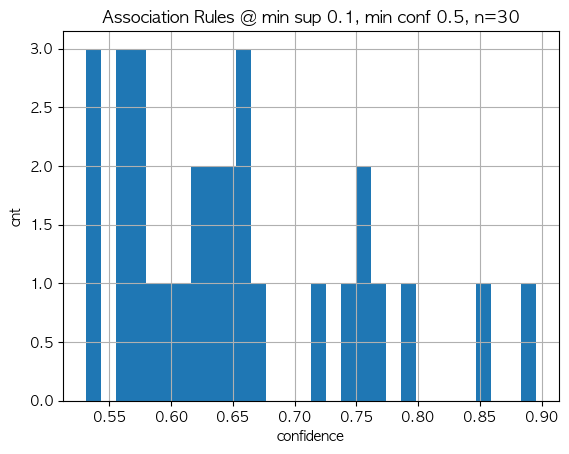

In [112]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

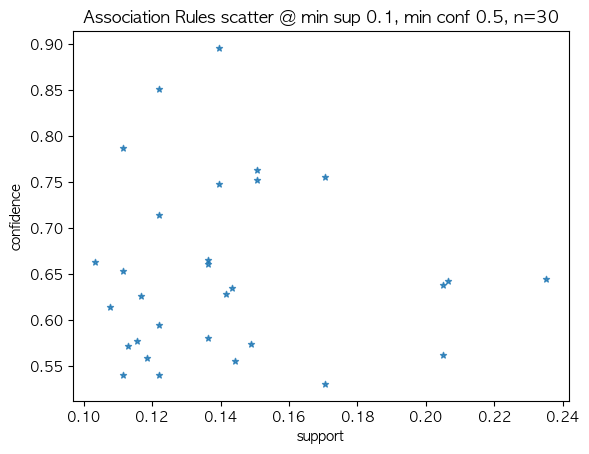

In [113]:
rules_conf.plot.scatter('support','confidence', alpha = 0.8, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

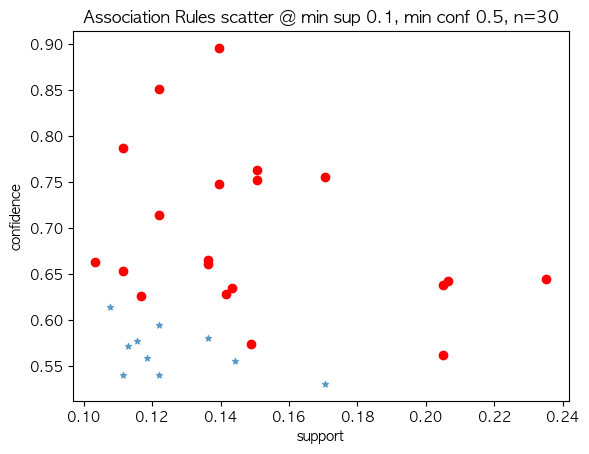

In [117]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [118]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
2,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
28,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.143262,0.321461,0.121937,0.851148,2.647749,0.075884,4.558483,0.726384,0.973085
20,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.225613,0.321461,0.170599,0.756159,2.352257,0.098073,2.782710,0.742363,0.926758
15,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839,0.913415
16,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097,0.902617
23,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.141674,0.321461,0.111502,0.787030,2.448290,0.065959,3.186072,0.689192,0.898531
3,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332,0.887506
6,(열상(찢어짐)),(남자),0.364564,0.584846,0.235141,0.644991,1.102839,0.021927,1.169418,0.146749,0.880131
9,(미끄러짐·넘어짐),(남자),0.321461,0.584846,0.206443,0.642202,1.098070,0.018438,1.160303,0.131623,0.848645
10,(미끄러짐·넘어짐),(열상(찢어짐)),0.321461,0.364564,0.205082,0.637968,1.749945,0.087888,1.755189,0.631582,0.843049


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - leverage가 0.65 이하인 경우 제거함
> - (인덱스 : 1, 25, 19, 26, 9, 6, 4, 22, 12, 13)

In [119]:
indices_to_drop = [1, 25, 19, 26, 9, 6, 4, 22, 12, 13]
top_10_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [120]:
top_10_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.143262,0.321461,0.121937,0.851148,2.647749,0.075884,4.558483,0.726384,0.973085
2,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.225613,0.321461,0.170599,0.756159,2.352257,0.098073,2.782710,0.742363,0.926758
3,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839,0.913415
4,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097,0.902617
5,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.141674,0.321461,0.111502,0.787030,2.448290,0.065959,3.186072,0.689192,0.898531
6,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332,0.887506
7,(미끄러짐·넘어짐),(열상(찢어짐)),0.321461,0.364564,0.205082,0.637968,1.749945,0.087888,1.755189,0.631582,0.843049
8,(열상(찢어짐)),(미끄러짐·넘어짐),0.364564,0.321461,0.205082,0.562539,1.749945,0.087888,1.551084,0.674425,0.767621
9,(체내 위험 이물질),(완구 및 게임용품),0.186706,0.259755,0.116833,0.625759,2.409037,0.068335,1.977992,0.719170,0.742592


#### [ 상위 20개 중 10개 뽑아냄 ]

##### 선행절, 후행절 특징
- 선행정과 후행절에 [위해원인]미끄러짐·넘어짐이 포함되어 있는 경우 다수 존재.
> - 전체 데이터셋에서 확인했을 때 품목별 분석에서의 결과를 토대로 추측되었던 '작은물품의 섭취 문제' 보다는 미끄러짐·넘어짐으로 인한 위해가 더 자주 발생
- 앞선 만 0세, 1세와 다르게 체내 위험 이물질, 코 관련 규칙 보임
> - 본인이 스스로 움직일 수 있고, 호기심이 많아지는 나이가 만 2세부터라는 것을 다시 한 번 입증
> - **이번에는 완구 및 게임용품에서 체내 위험 이물질 사고가 빈번하다는 규칙도 존재 --> 신기하게도 입보다 코로 더 많이 가져간다는 사실 확인 가능**
> - 빈발하는 [품목대분류]건축/인테리어 자재 및 작업공구를 제외시키고 분석한다면 섭취관련된 유의미한 규칙을 더 찾을 수 있을 것 같으나, 이는 굳지 진행하지 않음 (일부러 결과를 도출하기 위해 쥐어짜는 느낌이라)

In [122]:
# 보고서용 정렬
top_10_rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.143262,0.321461,0.121937,0.851148,2.647749,0.075884,4.558483,0.726384,0.973085
5,"(건축/인테리어 자재 및 작업공구, 남자)",(미끄러짐·넘어짐),0.141674,0.321461,0.111502,0.787030,2.448290,0.065959,3.186072,0.689192,0.898531
3,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839,0.913415
2,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.225613,0.321461,0.170599,0.756159,2.352257,0.098073,2.782710,0.742363,0.926758
4,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097,0.902617
6,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332,0.887506
7,(미끄러짐·넘어짐),(열상(찢어짐)),0.321461,0.364564,0.205082,0.637968,1.749945,0.087888,1.755189,0.631582,0.843049
9,(체내 위험 이물질),(완구 및 게임용품),0.186706,0.259755,0.116833,0.625759,2.409037,0.068335,1.977992,0.719170,0.742592
8,(열상(찢어짐)),(미끄러짐·넘어짐),0.364564,0.321461,0.205082,0.562539,1.749945,0.087888,1.551084,0.674425,0.767621


## 3. top 10 분포 확인

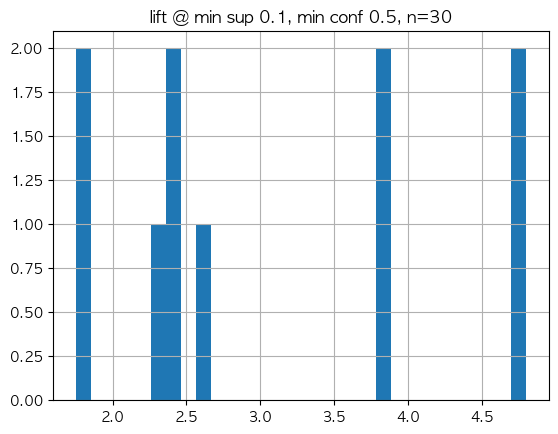

In [124]:
# 향상도 관찰
# 연관규칙의 향상도 분포
top_10_rules.hist('lift', bins = 30)
plt.title(f'lift {txt}')
plt.show()

In [125]:
filter = top_10_rules.lift.ge(3.5)
top_10_rules[filter].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
6,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332,0.887506
3,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839,0.913415
4,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097,0.902617


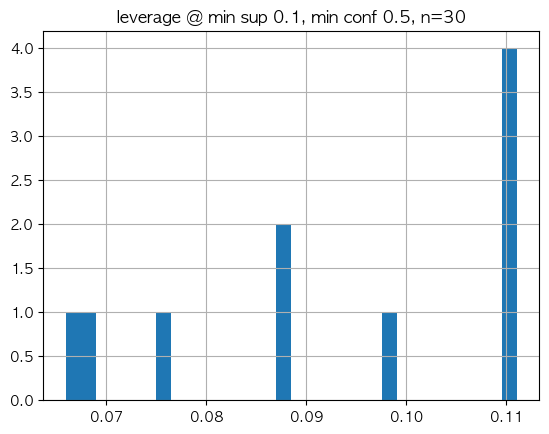

In [126]:
# 레버리지 관찰
# 연관규칙의 레버리지 분포
top_10_rules.hist('leverage', bins = 30)
plt.title(f'leverage {txt}')
plt.show()

In [127]:
filter = top_10_rules.leverage.ge(0.1)
top_10_rules[filter].sort_values(by='leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
3,(가구 및 가구설비),(추락),0.197482,0.200318,0.150635,0.762780,3.807853,0.111076,3.371058,0.918839,0.913415
4,(추락),(가구 및 가구설비),0.200318,0.197482,0.150635,0.751982,3.807853,0.111076,3.235724,0.922097,0.902617
0,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
6,(체내 위험 이물질),((부위)코),0.186706,0.155853,0.139632,0.747874,4.798584,0.110534,3.348111,0.973332,0.887506


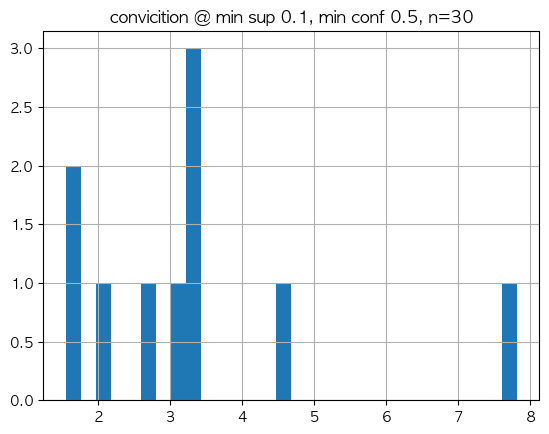

In [128]:
# 확신 관찰
# 연관규칙의 확신 분포
top_10_rules.hist('conviction', bins = 30)
plt.title(f'convicition {txt}')
plt.show()  #inf 값 없음

In [129]:
filter = top_10_rules.conviction.ge(4)
top_10_rules[filter].sort_values(by='conviction', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,((부위)코),(체내 위험 이물질),0.155853,0.186706,0.139632,0.895924,4.798584,0.110534,7.814447,0.937757,1.035557
1,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.143262,0.321461,0.121937,0.851148,2.647749,0.075884,4.558483,0.726384,0.973085


## 4. top 10 시각화

In [130]:
from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in top_10_rules.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color='orange', size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color='purple', size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules.html")

association_rules.html


In [131]:
# 전체에 대해서

from pyvis.network import Network

# pyvis 네트워크 생성
net = Network(notebook=True, directed=True)

# 색상과 크기 설정 함수
def get_color(confidence):
    if confidence > 0.9:
        return 'red'
    elif confidence > 0.8:
        return 'orange'
    elif confidence > 0.7:
        return 'green'
    elif confidence > 0.6:
        return 'blue'
    else:
        return 'purple'

# 노드와 엣지 추가
for _, row in rules_conf.iterrows():
    for item in row['antecedents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=5)
    for item in row['consequents']:
        net.add_node(item, label=item, title=item, color=get_color(row['confidence']), size=10)
    net.add_edge(
        list(row['antecedents'])[0],
        list(row['consequents'])[0],
        title=f"Confidence: {row['confidence']:.2f}",
        width=0.5
    )

# 네트워크 시각화
net.show("association_rules_전체데이터.html")  # 얘 이름 바꾸면서 저장하깅

association_rules_전체데이터.html


# [ 4세 분석 ]

In [132]:
df_v1 = df_age[df_age['나이'] == 4]
df_v1['나이'].unique()

array([4])

In [133]:
df_v1 = df_v1[['성별', '위해원인', '위해증상', '위해부위', '발생장소', '품목대분류']]
df_v1.head(10)

,성별,위해원인,위해증상,위해부위,발생장소,품목대분류
40,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
47,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
52,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
62,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
70,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
74,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
82,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 침실/방,식물 식품
92,여자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 침실/방,식물 식품
98,남자,이물질(기타),체내 위험 이물질,(부위)코,주택 - 거실,식물 식품
114,여자,식품 섭취에 의한 위험 및 위해,피부염 또는 피부발진,(부위)전신 손상,주택 - 주방,식물 식품


## 1. 빈발항목 분석

In [134]:
# 데이터 변환: 각 사건을 리스트로 변환
transactions = df_v1.apply(lambda x: list(x.dropna()), axis=1).tolist()

# 트랜잭션 인코더를 사용하여 원-핫 인코딩
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [135]:
df_encoded.shape
df_encoded.head(10)

,(부위)귀 및 고막,(부위)기타 얼굴부위,(부위)눈 및 눈주변(눈썹 및 눈꺼풀),"(부위)다리(무릎 아래, 무릎 및 발목 제외)",(부위)다리(무릎 위),(부위)둔부,(부위)등,(부위)머리 및 뇌(뇌막),(부위)목,(부위)무릎,...,폭발,피부염 또는 피부발진,피부접촉에 의한 위험 및 위해,호흡기계통 장기손상 및 통증,화상-뜨거운 액체나 증기로 인한,화상-열에 의한,화상-전기에 의한,화상-화학물로 인한,화장품 및 화장용품,화재 안전 및 보안 장비
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [136]:
# 항목별로 존재 개수 확인
df_encoded.sum().nlargest(10)

남자                   4351
여자                   2896
열상(찢어짐)              2621
미끄러짐·넘어짐             2588
완구 및 게임용품            2183
주택 - 거실              1571
건축/인테리어 자재 및 작업공구    1523
주택 - 침실/방            1462
추락                   1394
(부위)머리 및 뇌(뇌막)       1281
dtype: int64

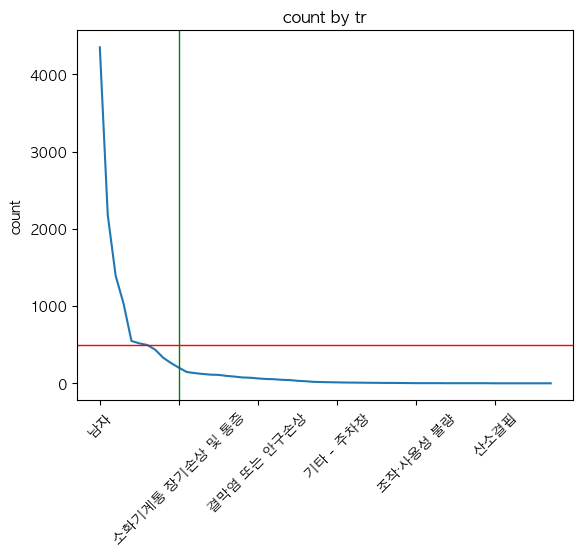

In [137]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

df_encoded.sum().sort_values(ascending=False)[::4].plot()
plt.title('count by tr')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.axvline(x=10, color='g', linewidth=1)
plt.axhline(y=500, color='r', linewidth=1)

plt.show()

In [138]:
# 최소 및 최대 지지도 설정
min_support = 0.1
max_support = 0.9

# 빈발집합 분석 수행
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# 최대 지지도 필터 적용
frequent_itemsets = frequent_itemsets[frequent_itemsets['support'] <= max_support]

# 결과 출력
frequent_itemsets.sort_values(by='support', ascending=False)
# frequent_itemsets

,support,itemsets
0,0.600138,(남자)
5,0.399448,(여자)
6,0.361517,(열상(찢어짐))
11,0.356966,(미끄러짐·넘어짐)
12,0.301103,(완구 및 게임용품)
16,0.228000,"(남자, 열상(찢어짐))"
22,0.225793,"(남자, 미끄러짐·넘어짐)"
1,0.216690,(주택 - 거실 )
13,0.210069,(건축/인테리어 자재 및 작업공구)
23,0.204966,"(미끄러짐·넘어짐, 열상(찢어짐))"


## 2. 연관규칙 분석

In [139]:
# 상위 규칙 확인
min_threshold=0.5
rules_conf = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
rules_conf.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.128414,0.356966,0.106483,0.829216,2.322958,0.060643,3.765189,0.653423
15,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.210069,0.356966,0.153655,0.731451,2.049081,0.078668,2.394478,0.648128
5,(가구 및 가구설비),(추락),0.174069,0.192276,0.126897,0.729002,3.791436,0.093427,2.980549,0.891415
18,"(건축/인테리어 자재 및 작업공구, 미끄러짐·넘어짐)",(열상(찢어짐)),0.153655,0.361517,0.106483,0.692998,1.916916,0.050934,2.079736,0.565170
6,(추락),(가구 및 가구설비),0.192276,0.174069,0.126897,0.659971,3.791436,0.093427,2.429004,0.911509
4,((부위)머리 및 뇌(뇌막)),(남자),0.176690,0.600138,0.114069,0.645589,1.075735,0.008031,1.128245,0.085512
13,"(미끄러짐·넘어짐, 열상(찢어짐))",(남자),0.204966,0.600138,0.129655,0.632571,1.054042,0.006648,1.088269,0.064489
8,(미끄러짐·넘어짐),(남자),0.356966,0.600138,0.225793,0.632535,1.053982,0.011565,1.088163,0.079650
2,(열상(찢어짐)),(남자),0.361517,0.600138,0.228000,0.630675,1.050884,0.011040,1.082684,0.075836
16,(건축/인테리어 자재 및 작업공구),(남자),0.210069,0.600138,0.130345,0.620486,1.033905,0.004274,1.053616,0.041514


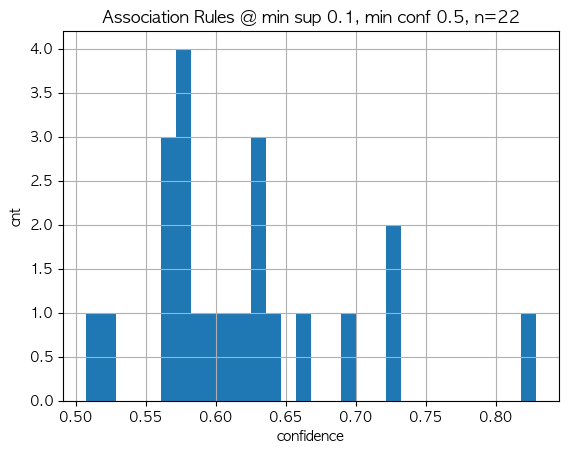

In [140]:
# 신뢰도 관찰
rules_conf.hist('confidence' , bins= 30)

plt.xlabel('confidence')
plt.ylabel('cnt')
txt=f'@ min sup {min_support}, min conf {min_threshold}, n={rules_conf.shape[0]}'
plt.title(f'Association Rules {txt}')
plt.show()

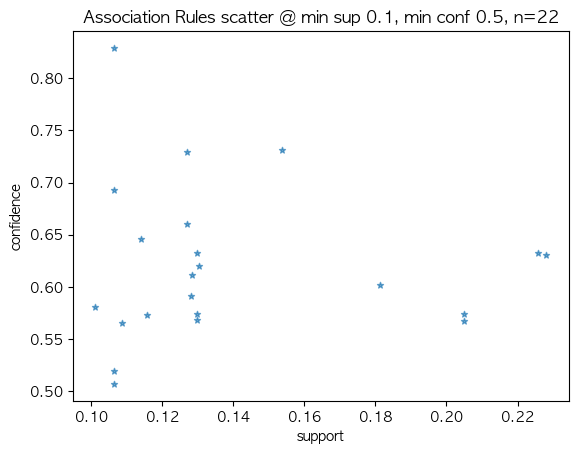

In [142]:
rules_conf.plot.scatter('support','confidence', alpha = 0.65, marker = '*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')
plt.show()

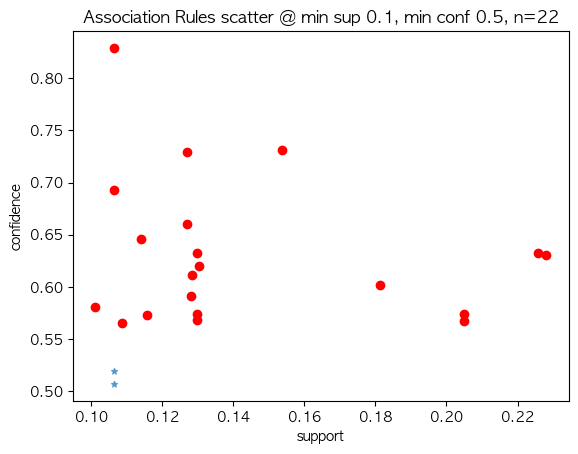

In [143]:
# 새로운 값을 support와 confidence의 합으로 정의
rules_conf['combined_value'] = rules_conf['support'] + rules_conf['confidence']

# combined_value 값을 기준으로 상위 20개의 규칙 추출
top_20_rules = rules_conf.nlargest(20, 'combined_value')

# Scatter plot of association rules
rules_conf.plot.scatter('support', 'confidence', alpha=0.6, marker='*')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title(f'Association Rules scatter {txt}')

# 상위 30개의 규칙 강조 표시
plt.scatter(top_20_rules['support'], top_20_rules['confidence'], color='red')

plt.show()

In [144]:
top_20_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
19,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.128414,0.356966,0.106483,0.829216,2.322958,0.060643,3.765189,0.653423,0.935699
15,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.210069,0.356966,0.153655,0.731451,2.049081,0.078668,2.394478,0.648128,0.885106
2,(열상(찢어짐)),(남자),0.361517,0.600138,0.228000,0.630675,1.050884,0.011040,1.082684,0.075836,0.858675
8,(미끄러짐·넘어짐),(남자),0.356966,0.600138,0.225793,0.632535,1.053982,0.011565,1.088163,0.079650,0.858328
5,(가구 및 가구설비),(추락),0.174069,0.192276,0.126897,0.729002,3.791436,0.093427,2.980549,0.891415,0.855898
18,"(건축/인테리어 자재 및 작업공구, 미끄러짐·넘어짐)",(열상(찢어짐)),0.153655,0.361517,0.106483,0.692998,1.916916,0.050934,2.079736,0.565170,0.799481
6,(추락),(가구 및 가구설비),0.192276,0.174069,0.126897,0.659971,3.791436,0.093427,2.429004,0.911509,0.786868
14,(완구 및 게임용품),(남자),0.301103,0.600138,0.181241,0.601924,1.002976,0.000538,1.004487,0.004246,0.783165
9,(미끄러짐·넘어짐),(열상(찢어짐)),0.356966,0.361517,0.204966,0.574189,1.588274,0.075916,1.499450,0.575997,0.779154
10,(열상(찢어짐)),(미끄러짐·넘어짐),0.361517,0.356966,0.204966,0.566959,1.588274,0.075916,1.484928,0.580103,0.771925


#### [top10 구하기]
- 종속성이 낮다고 판단되는 행 제거
> - lift, leverage 값 기준으로 판단
> - leverage가 0.05 이하인 경우 제거함
> - (인덱스 : 3, 7, 1, 12, 11, 0, 16, 4, 13, 14, 8, 2)

In [145]:
indices_to_drop = [3, 7, 1, 12, 11, 0, 16, 4, 13, 14, 8, 2]
top_8_rules= top_20_rules.drop(indices_to_drop).reset_index(drop=True)

In [146]:
top_8_rules.sort_values(by='combined_value', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combined_value
0,"(건축/인테리어 자재 및 작업공구, 열상(찢어짐))",(미끄러짐·넘어짐),0.128414,0.356966,0.106483,0.829216,2.322958,0.060643,3.765189,0.653423,0.935699
1,(건축/인테리어 자재 및 작업공구),(미끄러짐·넘어짐),0.210069,0.356966,0.153655,0.731451,2.049081,0.078668,2.394478,0.648128,0.885106
2,(가구 및 가구설비),(추락),0.174069,0.192276,0.126897,0.729002,3.791436,0.093427,2.980549,0.891415,0.855898
3,"(건축/인테리어 자재 및 작업공구, 미끄러짐·넘어짐)",(열상(찢어짐)),0.153655,0.361517,0.106483,0.692998,1.916916,0.050934,2.079736,0.565170,0.799481
4,(추락),(가구 및 가구설비),0.192276,0.174069,0.126897,0.659971,3.791436,0.093427,2.429004,0.911509,0.786868
5,(미끄러짐·넘어짐),(열상(찢어짐)),0.356966,0.361517,0.204966,0.574189,1.588274,0.075916,1.499450,0.575997,0.779154
6,(열상(찢어짐)),(미끄러짐·넘어짐),0.361517,0.356966,0.204966,0.566959,1.588274,0.075916,1.484928,0.580103,0.771925
7,(건축/인테리어 자재 및 작업공구),(열상(찢어짐)),0.210069,0.361517,0.128414,0.611293,1.690911,0.052470,1.642583,0.517264,0.739707


#### [ 상위 20개 중 8개 뽑아냄 ]

##### 선행절, 후행절 특징
- 선행정과 후행절에 [품목대분류]건축/인테리어 자재 및 작업공구, [위해원인]열상(찢어짐)/미끄러짐·넘어짐이 포함되어 있는 경우 다수 존재.
> - 오히려 만 4세가 되니까 섭취나 코로 완구를 가져가는 일 드물어짐; 집안에서의 교육으로 인해 달라진 양상을 보인다고 추측할 수 있음

==> 굳이 그 외 내용을 더 분석할 필요는 없어보임